# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble("PED00156e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.top.pdb'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x244b1844520>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x244b18443d0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x244c190bee0>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x244b3c28820>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x244c190b880>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x244b77043a0>}

## Featurization

In [5]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52', 

{'PED00156e001': array([[0.55313385, 0.7061223 , 0.8809687 , ..., 0.5305846 , 0.7732524 ,
         0.5582018 ],
        [0.58550507, 0.8509589 , 1.0959796 , ..., 0.5325418 , 0.539001  ,
         0.63170296],
        [0.67800623, 0.9509757 , 0.9319889 , ..., 0.6095216 , 0.8051703 ,
         0.7077787 ],
        ...,
        [0.587443  , 0.88177073, 1.1968241 , ..., 0.6456154 , 0.8616145 ,
         0.57675415],
        [0.57238317, 0.68313426, 0.9524447 , ..., 0.50012326, 0.44726157,
         0.58926785],
        [0.68145967, 0.82751644, 0.9572749 , ..., 0.5688918 , 0.7963398 ,
         0.63280207]], dtype=float32),
 'PED00157e001': array([[0.6495442 , 0.96694696, 1.2220702 , ..., 0.65438366, 0.8865197 ,
         0.5279636 ],
        [0.52379465, 0.63140607, 0.6930098 , ..., 0.69837767, 1.0237733 ,
         0.67390716],
        [0.5624305 , 0.7243537 , 0.9198948 , ..., 0.61918   , 0.92196625,
         0.6159501 ],
        ...,
        [0.57145643, 0.90897983, 1.0910196 , ..., 0.60696155,

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 1653)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 10
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[ 24.544357  , -10.179412  ],
       [-18.529932  ,  61.41796   ],
       [-10.3104925 ,  73.48696   ],
       [ 12.672372  ,  -1.183803  ],
       [ 14.407524  ,  -2.0230606 ],
       [  9.145441  , -43.54084   ],
       [-23.217072  ,  61.17371   ],
       [ -9.728848  ,  10.26913   ],
       [-17.018192  ,  59.454887  ],
       [-15.096683  ,  65.7562    ],
       [-14.947816  ,  57.412033  ],
       [ -8.997549  ,  71.415665  ],
       [-13.842609  ,  69.78976   ],
       [-16.19014   ,  72.65317   ],
       [ 50.10664   , -16.309746  ],
       [ 11.194891  , -11.596494  ],
       [-18.645416  ,  66.53303   ],
       [-17.523636  ,  47.790478  ],
       [-18.637754  ,  57.79122   ],
       [-21.891285  ,  64.807465  ],
       [-20.672714  ,  67.27608   ],
       [ 11.9714155 , -31.71439   ],
       [ 11.573369  , -41.821312  ],
       [ -4.293517  ,   7.351505  ],
       [  1.1929014 ,  -8.602491  ],
       [-12.552246  ,  63.77235   ],
       [  8.101481  , -12.624043  ],
 

## Analysis

In [7]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_density(save=True)

This analysis is only valid for t-SNE reduction with phi_psi feature extraction.


In [8]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[-1.2274388 , -1.8650949 , -1.7656305 , ..., -0.65235275,
          0.36852172, -1.0492438 ],
        [-1.3948162 , -2.7970872 , -2.1043155 , ...,  2.1060603 ,
         -0.5932995 , -1.2692754 ],
        [-2.4795108 , -2.0121255 ,  1.1866307 , ...,  1.4275305 ,
          1.3126214 , -2.9818678 ],
        ...,
        [-2.182733  ,  1.1824315 , -1.4949242 , ...,  1.7167201 ,
          1.9678696 ,  1.5980374 ],
        [-1.3756931 , -1.9858395 , -1.2259734 , ..., -0.5132401 ,
         -0.776476  ,  1.6189235 ],
        [-2.3890178 , -1.3732291 , -2.0347402 , ...,  0.48431852,
          1.3333491 , -1.3583573 ]], dtype=float32),
 'PED00157e001': array([[-1.7665014 , -1.3698096 , -1.1238647 , ..., -1.0514325 ,
          2.1312811 , -0.6520391 ],
        [-1.3086435 , -1.0817525 , -1.4373057 , ..., -0.7761799 ,
          1.7648789 ,  2.4600096 ],
        [-1.1393118 , -1.0456723 , -1.7348104 , ...,  2.7404232 ,
          2.0652642 ,  1.7510108 ],
        ...,
       

C:\Users/nikol/Documents/GitHub/EnsembleTools\dpet\visualization.py:286: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (clustering labels)'}>,
       <Axes: title={'center': 'Scatter plot (end_to_end labels)'}>,
       <Axes: title={'center': 'Density Plot (Ensemble-wise)'}>],
      dtype=object)

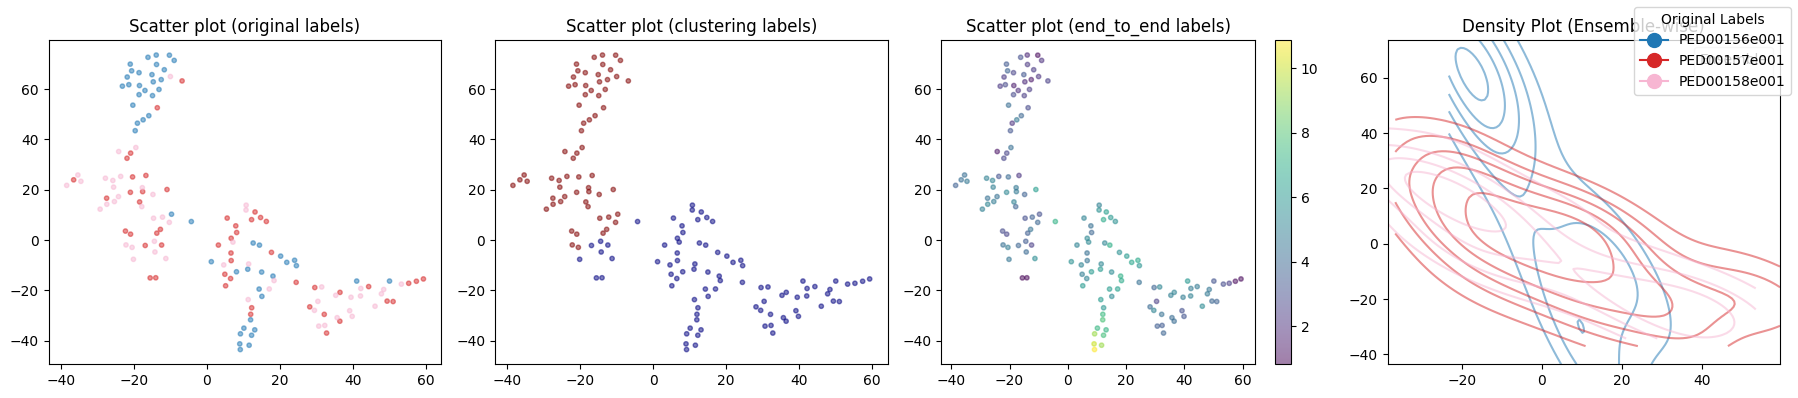

In [12]:
visualization.tsne_scatter(color_by="end_to_end", save=False, kde_by_ensemble=True)

In [10]:
visualization.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\tsne.pdf


In [11]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\custom_report.pdf
